Import Library yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
import os

Membaca Data Prakiraan Cuaca

In [ ]:
file1 = pd.read_csv('/content/data-prakiraan-cuaca-bulan-januari-2017.csv',encoding='cp1252')
file2 = pd.read_csv('/content/data-prakiraan-cuaca-bulan-februari-2017.csv',encoding='cp1252')
file3 = pd.read_csv('/content/data-prakiraan-cuaca-bulan-maret-2017.csv',encoding='cp1252')

Menggabungkan Data 3 Bulan menjadi 1 File

In [ ]:
# Gabungkan DataFrames
combined_data = pd.concat([file1, file2, file3], ignore_index=True)

# Simpan hasil gabungan ke dalam file CSV baru
combined_data.to_csv('combined_file.csv', index=False)

Membaca Data Gabungan

In [ ]:
df = pd.read_csv(r"/content/combined_file.csv",encoding='cp1252')
df

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2017-01-03,Jakarta Pusat,Pagi,Hujan Ringan,65 - 95,22 - 31
1,2017-01-03,Jakarta Utara,Pagi,Berawan,65 - 95,22 - 31
2,2017-01-03,Jakarta Selatan,Pagi,Berawan,65 - 95,22 - 31
3,2017-01-03,Jakarta Barat,Pagi,Hujan Ringan,65 - 95,22 - 31
4,2017-01-03,Jakarta Timur,Pagi,Hujan Ringan,65 - 95,22 - 31
...,...,...,...,...,...,...
1735,2017-03-31,Jakarta Barat,Dini Hari,Cerah Berawan,75 - 100,24 - 33
1736,2017-03-31,Jakarta Selatan,Dini Hari,Cerah Berawan,75 - 100,24 - 33
1737,2017-03-31,Kepulauan Seribu,Dini Hari,Cerah Berawan,75 - 100,24 - 33
1738,2017-03-31,Jakarta Pusat,Dini Hari,Cerah Berawan,75 - 100,24 - 33


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740 entries, 0 to 1739
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tanggal               1740 non-null   object
 1   wilayah               1740 non-null   object
 2   waktu                 1740 non-null   object
 3   cuaca                 1740 non-null   object
 4   kelembaban_persen     1740 non-null   object
 5   suhu_derajat_celcius  1740 non-null   object
dtypes: object(6)
memory usage: 81.7+ KB
None


Menambahkan Kolom Bulan

In [ ]:
combined_data['Bulan'] = pd.to_datetime(combined_data['tanggal']).dt.month
combined_data.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,Bulan
0,2017-01-03,Jakarta Pusat,Pagi,Hujan Ringan,65 - 95,22 - 31,1
1,2017-01-03,Jakarta Utara,Pagi,Berawan,65 - 95,22 - 31,1
2,2017-01-03,Jakarta Selatan,Pagi,Berawan,65 - 95,22 - 31,1
3,2017-01-03,Jakarta Barat,Pagi,Hujan Ringan,65 - 95,22 - 31,1
4,2017-01-03,Jakarta Timur,Pagi,Hujan Ringan,65 - 95,22 - 31,1




```

```

# DATA ANALISIS!

Manakah 10 suhu terpanas dan jumlahnya?

In [ ]:
df['suhu_derajat_celcius'].value_counts().sort_values(ascending=False).head(10)

24 - 32    402
24 - 33    162
24 - 30    120
22 - 32    120
24 - 31    120
23 - 31    120
23 - 33     72
23 - 32     72
22 - 31     60
21 - 33     60
Name: suhu_derajat_celcius, dtype: int64

In [ ]:
df = pd.read_csv('/content/combined_file.csv')

In [ ]:
figure = px.line(df, x="tanggal",
                 y="suhu_derajat_celcius",
                 title='temperatur di jakarta dalam 3 bulan')
figure.show()

Menganalisis cuaca yang paling sering terjadi

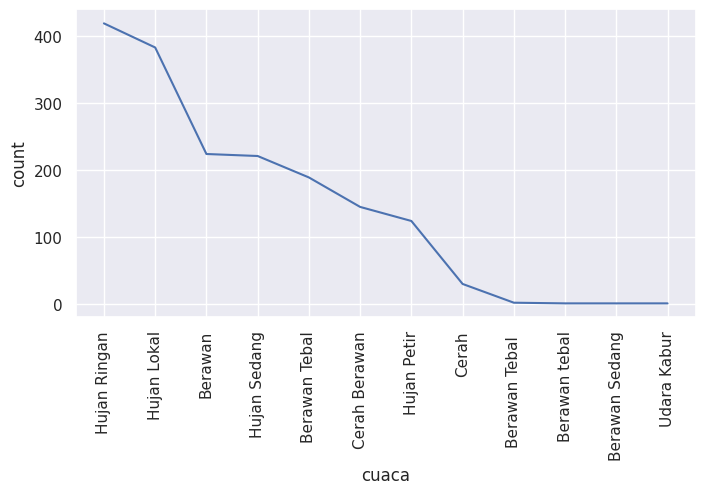

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})
plt.xticks(rotation=90)
sns.lineplot(x=cuaca['cuaca'], y=cuaca['count'],data=cuaca)
plt.show()

In [ ]:
cuaca = df['cuaca'].value_counts().reset_index()
cuaca.columns=['cuaca','count']
cuaca.head()



,cuaca,count
0,Hujan Ringan,419
1,Hujan Lokal,383
2,Berawan,224
3,Hujan Sedang,221
4,Berawan Tebal,189


Kapan Ketika Kelembapan Udara Maksimum?

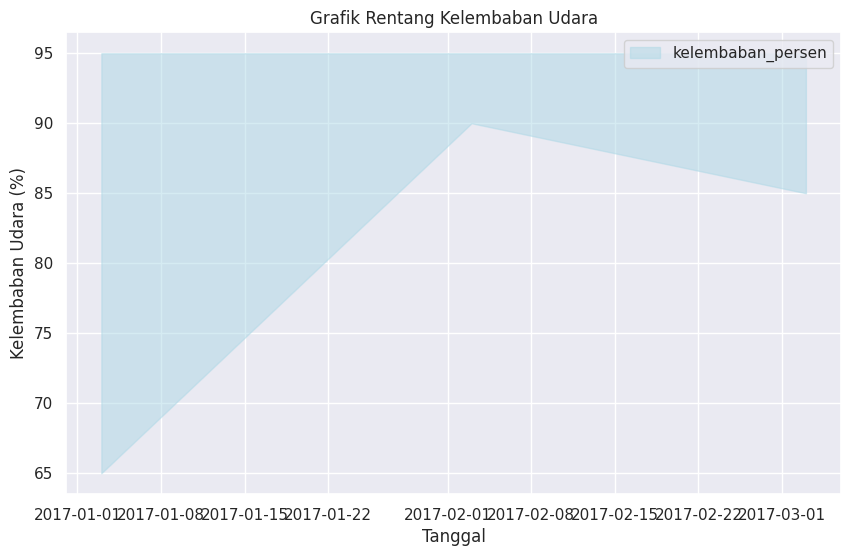

In [ ]:
data = {'tanggal': ['2017-01-03', '2017-02-03', '2017-03-03'],'kelembaban_persen': ['65-95', '90-95', '85-95',]}
df = pd.DataFrame(data)

df[['Kelembaban_Min', 'Kelembaban_Max']] = df['kelembaban_persen'].str.split('-', expand=True)


df['tanggal'] = pd.to_datetime(df['tanggal'])

df['Kelembaban_Min'] = pd.to_numeric(df['Kelembaban_Min'])
df['Kelembaban_Max'] = pd.to_numeric(df['Kelembaban_Max'])

plt.figure(figsize=(10, 6))
plt.fill_between(df['tanggal'], df['Kelembaban_Min'], df['Kelembaban_Max'], color='lightblue', alpha=0.5, label='kelembaban_persen')
plt.title('Grafik Rentang Kelembaban Udara')
plt.xlabel('Tanggal')
plt.ylabel('Kelembaban Udara (%)')


plt.legend()


plt.show()







Cuaca yang sering bersamaan





In [ ]:
df = pd.read_csv('/content/combined_file.csv')

In [ ]:
cuaca_kota = df.set_index('wilayah')['cuaca']

print(cuaca_kota)

cuaca_serupa = cuaca_kota.value_counts()


print("Cuaca yang sering bersamaan:")
print(cuaca_serupa)

wilayah
Jakarta Pusat        Hujan Ringan
Jakarta Utara             Berawan
Jakarta Selatan           Berawan
Jakarta Barat        Hujan Ringan
Jakarta Timur        Hujan Ringan
                        ...      
Jakarta Barat       Cerah Berawan
Jakarta Selatan     Cerah Berawan
Kepulauan Seribu    Cerah Berawan
Jakarta Pusat       Cerah Berawan
Jakarta Utara       Cerah Berawan
Name: cuaca, Length: 1740, dtype: object
Cuaca yang sering bersamaan:
Hujan Ringan      419
Hujan Lokal       383
Berawan           224
Hujan Sedang      221
Berawan Tebal     189
Cerah Berawan     145
Hujan Petir       124
Cerah              30
Berawan Tebal       2
Berawan tebal       1
Berawan Sedang      1
Udara Kabur         1
Name: cuaca, dtype: int64


Adakah daerah di indonesia yang mengalami Hujan Ringan pada bulan januari

In [ ]:
df = pd.read_csv('/content/combined_file.csv')

In [ ]:

# filter data
df['tanggal'] = pd.to_datetime(df['tanggal'])
data_januari = df[(df['tanggal'].dt.month == 1)]

# filter daerah yang mengalami Hujan Ringan
daerah_hujan_ringan = data_januari[data_januari['cuaca'] == 'Hujan Ringan']

# Menampilkan daerah yang mengalami hujan ringan pada bulan Januari
if not daerah_hujan_ringan.empty:
    print("Daerah yang mengalami Hujan Ringan pada bulan Januari:")
    print(daerah_hujan_ringan[['tanggal', 'wilayah']])
else:
    print("Tidak ada informasi Hujan Ringan pada bulan Januari.")


Daerah yang mengalami Hujan Ringan pada bulan Januari:
       tanggal           wilayah
0   2017-01-03     Jakarta Pusat
3   2017-01-03     Jakarta Barat
4   2017-01-03     Jakarta Timur
5   2017-01-03  Kepulauan Seribu
12  2017-01-03     Jakarta Pusat
..         ...               ...
436 2017-01-30     Jakarta Timur
437 2017-01-30  Kepulauan Seribu
439 2017-01-30     Jakarta Utara
440 2017-01-30   Jakarta Selatan
443 2017-01-30  Kepulauan Seribu

[149 rows x 2 columns]
